Hebani Duggal hd288 Problem Set 4 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

1. All answers (except for the 1b graph) are boxed on handwritten pdf. The following is just calculating cdf to plug in/misc work. 

In [3]:
def gaussian(x,mu=0.,sigma=1.):
    return np.exp(-(x-mu)**2/(2.*sigma**2))/(sigma*np.sqrt(2.*np.pi))

In [4]:
# "cumulative distribution function"
def cdf(xmax): return .0001*sum(gaussian(np.arange(-6,xmax,.0001)))
print cdf(-.5)

0.308519934616


In [5]:
print cdf (-2)

0.0227474315031


1b. 

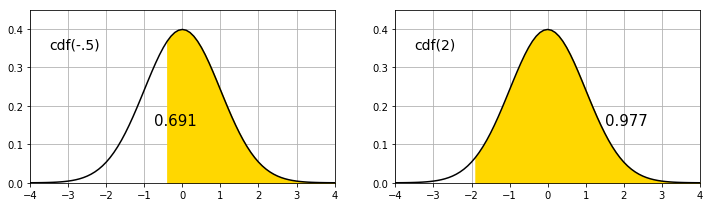

In [6]:
plt.figure(figsize=(12,7))
x=np.arange(-5,5.1,.1)
y=gaussian(x)

def gfig(xt,yt,t,t0,sb):
    plt.subplot(2,2,sb)
    plt.plot(x,y,'k')
    plt.gca().set_axisbelow(True)
    plt.yticks(np.arange(0,.5,.1))
    plt.grid('on')
    plt.axis([-4,4,0,.45])
    plt.text(xt,yt,t,fontsize=15)
    plt.text(-3.5,.35,t0,fontsize=14)
    
gfig(-.75,.15,.691,'cdf(-.5)',1)
plt.fill_between(x,y,color='gold',where=x>-.5)

gfig(1.5,.15,.977,'cdf(2)',2)
plt.fill_between(x,y,color='gold',where=x>-2)

In [33]:
print cdf (-1)

0.158643154608


In [34]:
print 1 - 0.0668007245635
print 1 - 0.158643154608

0.933199275436
0.841356845392


In [8]:
print cdf (-2.2)

0.0139016728623


In [9]:
print cdf (-1)

0.158643154608


In [10]:
print cdf (-5)

2.85590958214e-07


In [11]:
from scipy.misc import factorial
def poisson(m,z): return np.exp(-z)*z**m/factorial(m)

2a.

In [12]:
prob0 = poisson(0, z = 0.3671232877)
print prob0*134
                
prob1 = poisson(1, z = 0.3671232877)
print prob1*134

prob2 = poisson(2, z = 0.3671232877)
print prob2*134

prob3 = poisson(3, z = 0.3671232877)
print prob3*134

prob4 = poisson(4, z = 0.3671232877)
print prob4*134

prob5 = poisson(5, z = 0.3671232877)
print prob5*134

prob6 = poisson(6, z = 0.3671232877)
print prob6*134

 

92.8250475438
34.0782366352
6.25545713627
0.765507996644
0.0702589531222
0.00515873957211
0.00031564890535


In [13]:
from scipy.stats import poisson

mu=134.0/365.0

values = []
std = []
for x in range(0,7):
    y = poisson.pmf(x, mu)*365
    values.append(y)
    std.append(y**.5)

print values
print std




[252.84434592893197, 92.82504754651201, 17.039118316756998, 2.085152378488984, 0.19137699912159159, 0.014051790620434693, 0.00085978992837362994]
[15.901080023977364, 9.6345756287712021, 4.1278466924968278, 1.4440056712108107, 0.4374665691473939, 0.11854024894707575, 0.029322174686977599]


<Container object of 3 artists>

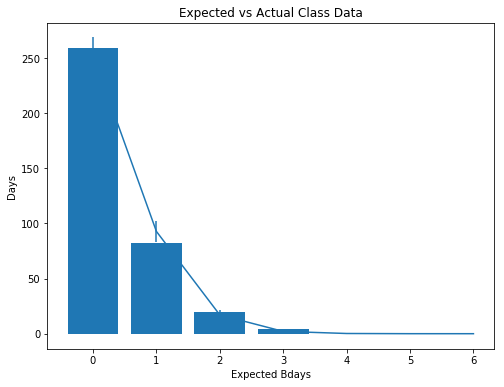

In [14]:
plt.figure(figsize=(8,6))
plt.xlabel('Expected Bdays'),plt.ylabel('Days')
plt.title('Expected vs Actual Class Data')
plt.bar(np.arange(0,4),[259, 82,20,4],align='center');
x = np.arange(0, 7, 1)
plt.errorbar(x,values,std)

2(a)(iii) below 

In [15]:
x = 10
mu = .3671232877
accum = []
for i in range(11):
    accum.append(poisson.pmf(i,mu)*268)

print accum

[185.65009508768341, 68.156473270407957, 12.510914272534668, 1.5310159932885929, 0.14051790624434732, 0.010317479144229041, 0.00063129781070092399, 3.3109161111762214e-05, 1.5193930100423913e-06, 6.1978284128351404e-08, 2.2753671435205078e-09]


2b.

In [16]:
from scipy.misc import factorial
def poisson(m,z): return np.exp(-z)*z**m/factorial(m)

In [17]:
prob0 = poisson(0,z=3)
print prob0

0.0497870683679


In [18]:
prob1 = poisson(1,z=3)
print prob1

0.149361205104


In [19]:
prob2 = poisson(2,z=3)
print prob2

0.224041807655


In [20]:
prob3 = poisson(3,z=3)
print prob3

0.224041807655


In [21]:
ProbUnderFour = prob0 + prob1 + prob2 + prob3
print ProbUnderFour

0.647231888782


2c.

In [22]:
prob0 = poisson(0, z=7)
print prob0*14000

12.7663475178


In [23]:
prob4 = poisson(4, z=7)
print prob4*14000

1277.16668292


In [24]:
prob7 = poisson(7, z=7)
print prob7*14000

2086.03891544


In [25]:
prob10 = poisson(10, z=7)
print prob10*14000

993.765761106


In [26]:
prob16 = poisson(16, z=7)
print prob16*14000

20.2775606387


3. 

In [27]:
from ps4data import wikidata

In [28]:
print len(wikidata), 'total, from "' + wikidata[0] + ' GMT" to "' + wikidata[-1] + ' GMT"'

74638 total, from "00:00, 5 March 2017 GMT" to "23:59, 11 March 2017 GMT"


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#http://docs.python.org/2/library/time.html
from time import time,strptime,strftime,gmtime
from calendar import timegm

def ts2utc(ts):    #convert timestring to utc
    return int(timegm(strptime(ts,'%H:%M, %d %B %Y')))

def utc2ts(utc):   #convert utc to timestring
    return strftime('%d/%b/%Y:%H:%M',gmtime(utc))

min=60
hr=60*60
day=24*hr

mar5=ts2utc('00:00, 5 March 2017')  # = 1488672000

3a. 

In [30]:
min=60
hr=60*60
day=24*hr

mar5=ts2utc('00:00, 5 March 2017')
mar59start=ts2utc('09:00, 5 March 2017')
mar59end=ts2utc('09:59, 5 March 2017')


x = []
vallist = list(Counter(wikidata).values())
keylist = list(Counter(wikidata).keys())
for i in range(len(keylist)):
    if ts2utc(keylist[i]) <= mar59end:
        x.append(vallist[i])
exp = []
std = []
r = max(x)
for i in range(r):
    now = x.count(i)
    exp.append(now)
    std.append(now**.5)




NameError: name 'Counter' is not defined

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('#edits/minute'),plt.ylabel('#minutes with that many edits')
plt.hist(x,align='left');
plt.errorbar(range(r),exp,std)



3b.

In [ ]:
starts =['14:00, 6 March 2017', '21:00, 7 March 2017', '02:00, 9 March 2017', '05:00, 10 March 2017', '23:00, 10 March 2017']
y = []

for i in range(len(starts)):
     y.append(ts2utc(starts[i]))
z = []
for i in range(len(y)):
    z.append(y[i]+59)


In [ ]:
counts = []

vallist = list(Counter(wikidata).values())
keylist = list(Counter(wikidata).keys())
for i in range(len(keylist)):
    current = ts2utc(keylist[i])
    for j in range(len(y)):
        if (current>=y[j]) & (current >= z[j]):
            counts.append(vallist[i])
#print counts
exp = []
std = []
r = max(counts)
#print r
for i in range(r):
    now = counts.count(i)
    exp.append(now)
    std.append(now**.5)

print exp
print std

plt.figure(figsize=(8,6))
plt.xlabel('#edits/minute'),plt.ylabel('#minutes with that many edits')
plt.hist(counts,align='left',bins = r);  
plt.errorbar(range(r),exp,std)


3c. 

In [ ]:
start =ts2utc('16:00, 6 March 2017')
end = ts2utc('18:59, 6 March 2017')




counts = []

vallist = list(Counter(wikidata).values())
keylist = list(Counter(wikidata).keys())
for i in range(len(keylist)):
    current = ts2utc(keylist[i])
    if (current>=start) & (current >= end):
        counts.append(vallist[i])
#print counts
exp = []
std = []
r = max(counts)
#print r
for i in range(r):
    now = counts.count(i)
    exp.append(now)
    std.append(now**.5)

print exp
print std

plt.figure(figsize=(8,6))
plt.xlabel('#edits/minute'),plt.ylabel('#minutes with that many edits')
plt.hist(counts,align='left',bins = r);  
plt.errorbar(range(r),exp,std)